In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
df = pd.read_csv('Norfolk_Location_Affordability_Index.csv')

In [17]:
df.head()

,OBJECTID_1,OBJECTID,GEOID,STATE,COUNTY,TRACT,BLOCKGROUP,STUSAB,households,area_media,...,hh_type8_9,hh_type810,hh_type811,hh_type812,hh_type813,hh_type814,Shape__Are,Shape__Len,Shape__Area,Shape__Length
0,194511,194515,517100038002,51,710,3800,2,VA,486,59293,...,35.89181,23.61142,12.28039,1.83,21259.80,66.87682,0.000034,0.030118,5.199465e+05,3699.181514
1,194512,194516,517100032003,51,710,3200,3,VA,479,59293,...,31.18820,18.55183,12.63636,1.85,22663.80,58.78688,0.000032,0.022790,4.937677e+05,2864.848997
2,197542,197546,517100066031,51,710,6603,1,VA,550,59293,...,38.79624,23.61142,15.18481,2.23,27365.04,19.41585,0.000110,0.060813,1.710321e+06,7449.611167
3,197543,197547,517100047002,51,710,4700,2,VA,107,59293,...,27.77232,15.17877,12.59354,1.83,23110.92,18.87652,0.000093,0.047384,1.437500e+06,5829.839916
4,197544,197548,517100024002,51,710,2400,2,VA,409,59293,...,45.05775,30.35754,14.70020,2.22,25022.52,39.37103,0.000039,0.028542,6.072452e+05,3391.361423


In [18]:
df.shape

(189, 199)

In [19]:
df.size

37611

In [20]:
column_labels = df.columns.tolist()
print(column_labels)

['OBJECTID_1', 'OBJECTID', 'GEOID', 'STATE', 'COUNTY', 'TRACT', 'BLOCKGROUP', 'STUSAB', 'households', 'area_media', 'blkgrp_med', 'blkgrp_m_1', 'avg_hh_siz', 'avg_hh_s_1', 'commuters_', 'commuter_1', 'pct_renter', 'gross_hh_d', 'median_roo', 'median_r_1', 'pct_detatc', 'median_com', 'block_dens', 'employment', 'local_job_', 'local_reta', 'retail_acc', 'hh_type1_i', 'hh_type1_s', 'hh_type1_w', 'hh_type1_h', 'hh_type1_1', 'hh_type1_t', 'hh_type1_a', 'hh_type1_v', 'hh_type1_2', 'hh_type1_3', 'hh_type1_4', 'hh_type1_5', 'hh_type1_6', 'hh_type1_7', 'hh_type1_8', 'hh_type1_9', 'hh_type110', 'hh_type111', 'hh_type112', 'hh_type113', 'hh_type114', 'hh_type2_i', 'hh_type2_s', 'hh_type2_w', 'hh_type2_h', 'hh_type2_1', 'hh_type2_t', 'hh_type2_a', 'hh_type2_v', 'hh_type2_2', 'hh_type2_3', 'hh_type2_4', 'hh_type2_5', 'hh_type2_6', 'hh_type2_7', 'hh_type2_8', 'hh_type2_9', 'hh_type210', 'hh_type211', 'hh_type212', 'hh_type213', 'hh_type214', 'hh_type3_i', 'hh_type3_s', 'hh_type3_w', 'hh_type3_h', 'h

In [21]:
columns_to_remove = ['TRACT', 'households','area_media','avg_hh_siz','gross_hh_d','median_com','employment','local_job_','hh_type1_i','hh_type1_h','hh_type1_t']
for col in columns_to_remove:
    if col in column_labels:
        column_labels.remove(col)

print(column_labels)  # The updated list without the specified columns

['OBJECTID_1', 'OBJECTID', 'GEOID', 'STATE', 'COUNTY', 'BLOCKGROUP', 'STUSAB', 'blkgrp_med', 'blkgrp_m_1', 'avg_hh_s_1', 'commuters_', 'commuter_1', 'pct_renter', 'median_roo', 'median_r_1', 'pct_detatc', 'block_dens', 'local_reta', 'retail_acc', 'hh_type1_s', 'hh_type1_w', 'hh_type1_1', 'hh_type1_a', 'hh_type1_v', 'hh_type1_2', 'hh_type1_3', 'hh_type1_4', 'hh_type1_5', 'hh_type1_6', 'hh_type1_7', 'hh_type1_8', 'hh_type1_9', 'hh_type110', 'hh_type111', 'hh_type112', 'hh_type113', 'hh_type114', 'hh_type2_i', 'hh_type2_s', 'hh_type2_w', 'hh_type2_h', 'hh_type2_1', 'hh_type2_t', 'hh_type2_a', 'hh_type2_v', 'hh_type2_2', 'hh_type2_3', 'hh_type2_4', 'hh_type2_5', 'hh_type2_6', 'hh_type2_7', 'hh_type2_8', 'hh_type2_9', 'hh_type210', 'hh_type211', 'hh_type212', 'hh_type213', 'hh_type214', 'hh_type3_i', 'hh_type3_s', 'hh_type3_w', 'hh_type3_h', 'hh_type3_1', 'hh_type3_t', 'hh_type3_a', 'hh_type3_v', 'hh_type3_2', 'hh_type3_3', 'hh_type3_4', 'hh_type3_5', 'hh_type3_6', 'hh_type3_7', 'hh_type3_8

In [23]:
data = df.drop(columns=column_labels)
data

,TRACT,households,area_media,avg_hh_siz,gross_hh_d,median_com,employment,local_job_,hh_type1_i,hh_type1_h,hh_type1_t
0,3800,486,59293,2.85,5.96732,6.02248,48165.77588,22.67156,59293,49.44440,18.58110
1,3200,479,59293,2.33,6.17953,5.84167,33658.88716,0.55086,59293,47.39086,18.90733
2,6603,550,59293,3.06,2.84426,8.71034,15197.17737,1.49847,59293,52.27269,22.53258
3,4700,107,59293,3.52,0.58502,5.93865,62479.76946,4.31257,59293,45.77810,19.16034
4,2400,409,59293,2.81,4.27015,8.10936,24583.86605,7.89294,59293,58.59942,21.57389
...,...,...,...,...,...,...,...,...,...,...,...
184,7002,621,59293,2.88,1.42636,5.17731,36194.85283,4.20169,59293,51.91892,21.37831
185,4300,270,59293,1.76,4.75531,4.61564,51482.79474,1.71022,59293,46.22403,18.49612
186,6606,396,59293,2.48,1.79877,10.04260,21453.08631,0.51932,59293,56.87089,22.57331
187,6501,540,59293,2.09,4.03211,8.92770,11968.21406,0.33484,59293,42.83362,18.25043


In [24]:
# Saving modified data to file
data.to_csv('norfolk_affordability_index_data_edited.csv', index=False)

Accuracy for 'hh_type1_h':
  Mean Squared Error: 23.858542634659692
  R² Score: 0.8670847712674362

Accuracy for 'hh_type1_t':
  Mean Squared Error: 1.391532034906963
  R² Score: 0.952599690901443



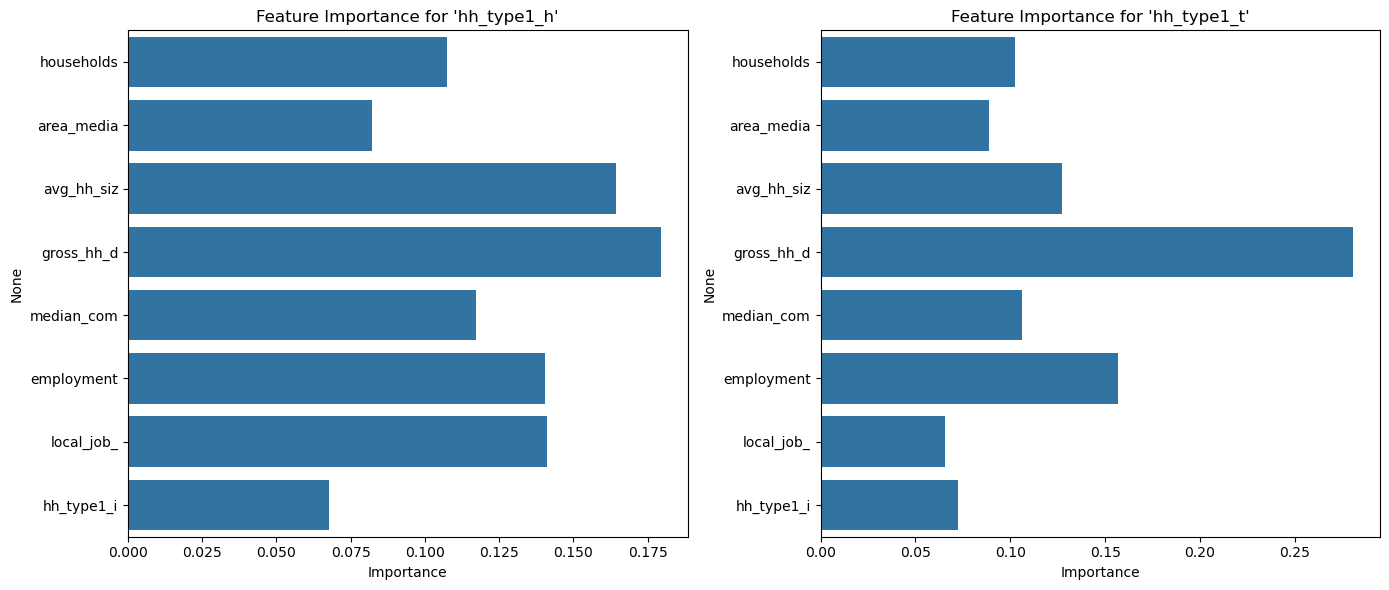

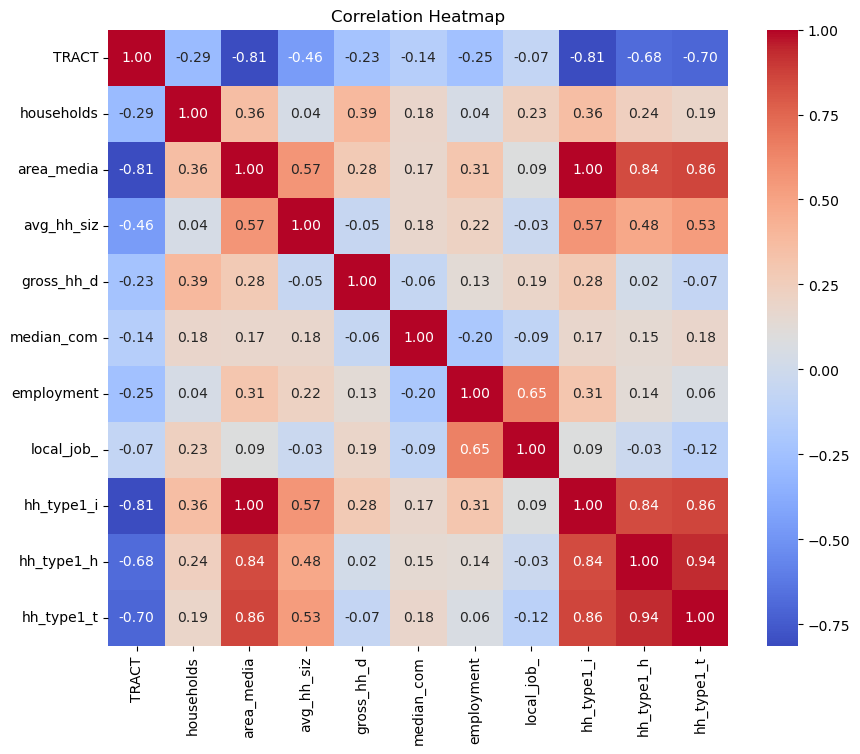

Predicted 'hh_type1_h' for TRACT 3800: 47.9882459
Predicted 'hh_type1_t' for TRACT 3800: 17.80636210000002


(47.9882459, 17.80636210000002)

In [26]:
# Reading data for Norfolk
data = pd.read_csv('norfolk_affordability_index_data_edited.csv')

# Defines independent variables and target variables
X = data.drop(columns=['TRACT', 'hh_type1_h', 'hh_type1_t'])
y_h = data['hh_type1_h']
y_t = data['hh_type1_t']

# Splits data into training and test sets
X_train, X_test, y_h_train, y_h_test, y_t_train, y_t_test = train_test_split(
    X, y_h, y_t, test_size=0.2, random_state=42
)

# Initializes and trains random forest regressors
rf_h = RandomForestRegressor(random_state=42)
rf_t = RandomForestRegressor(random_state=42)

rf_h.fit(X_train, y_h_train)
rf_t.fit(X_train, y_t_train)

# Makes predictions on the test set
y_h_pred = rf_h.predict(X_test)
y_t_pred = rf_t.predict(X_test)

# Calculation of accuracy metrics
mse_h = mean_squared_error(y_h_test, y_h_pred)
r2_h = r2_score(y_h_test, y_h_pred)
mse_t = mean_squared_error(y_t_test, y_t_pred)
r2_t = r2_score(y_t_test, y_t_pred)

print("Accuracy for 'hh_type1_h':")
print(f"  Mean Squared Error: {mse_h}")
print(f"  R² Score: {r2_h}\n")

print("Accuracy for 'hh_type1_t':")
print(f"  Mean Squared Error: {mse_t}")
print(f"  R² Score: {r2_t}\n")

# Function to predict for a specific 'TRACT'
def predict_for_tract(tract_value):
    tract_data = data[data['TRACT'] == tract_value]
    if tract_data.empty:
        print(f"Tract {tract_value} not found.")
        return None
    
    # Extract the feature values for the specific 'TRACT'
    X_tract = tract_data.drop(columns=['TRACT', 'hh_type1_h', 'hh_type1_t'])
    
    # Predict both targets
    hh_type1_h_pred = rf_h.predict(X_tract)[0]
    hh_type1_t_pred = rf_t.predict(X_tract)[0]
    
    print(f"Predicted Housing Cost % of Income for TRACT {tract_value}: {hh_type1_h_pred}")
    print(f"Predicted Transportation Cost % of Income for TRACT {tract_value}: {hh_type1_t_pred}")
    return hh_type1_h_pred, hh_type1_t_pred

# Feature importance graphs
feature_names = X.columns
importances_h = rf_h.feature_importances_
importances_t = rf_t.feature_importances_

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=importances_h, y=feature_names)
plt.title("Feature Importance for Housing Cost % of Income")
plt.xlabel("Importance")

plt.subplot(1, 2, 2)
sns.barplot(x=importances_t, y=feature_names)
plt.title("Feature Importance for Transportation Cost % of Income")
plt.xlabel("Importance")

plt.tight_layout()
plt.savefig('Norfolk Feature Importance for Housing and Transportation Cost % of Income.png')
plt.show()

# Correlation heatmap of all variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig('Norfolk Affordability Correlation Map.png')
plt.show()

# Example of predicting for a specific TRACT (e.g., 3800)
predict_for_tract(3800)

In [27]:
# Model for Portsmouth

df1 = pd.read_csv('Portsmouth_Location_Affordability_Index.csv')

In [28]:
df1.head()

,OBJECTID_1,OBJECTID,GEOID,STATE,COUNTY,TRACT,BLOCKGROUP,STUSAB,households,area_media,...,hh_type8_9,hh_type810,hh_type811,hh_type812,hh_type813,hh_type814,Shape__Are,Shape__Len,Shape__Area,Shape__Length
0,197799,197803,517402128022,51,740,212802,2,VA,495,59293,...,33.91608,18.55183,15.36425,2.21,28824.12,0.00000,0.000241,0.078183,3.729876e+06,9910.359603
1,197800,197804,517402130012,51,740,213001,2,VA,1176,59293,...,36.20108,20.79154,15.40953,2.23,28496.88,20.49451,0.000357,0.080871,5.526900e+06,10042.248601
2,197801,197805,517402131012,51,740,213101,2,VA,573,59293,...,27.12415,15.17877,11.94538,1.77,20973.60,52.31493,0.000044,0.044087,6.786051e+05,5040.943325
3,197802,197806,517402114002,51,740,211400,2,VA,127,59293,...,27.63235,15.17877,12.45357,1.83,22449.96,10.24725,0.000040,0.031080,6.214307e+05,3901.325506
4,197803,197807,517402131031,51,740,213103,1,VA,223,59293,...,38.85846,23.61142,15.24704,2.18,28895.40,0.00000,0.000084,0.043449,1.295276e+06,5216.098761


In [29]:
df1.shape

(80, 199)

In [30]:
df1.size

15920

In [32]:
data1 = df1.drop(columns=column_labels)
data1

,TRACT,households,area_media,avg_hh_siz,gross_hh_d,median_com,employment,local_job_,hh_type1_i,hh_type1_h,hh_type1_t
0,212802,495,59293,2.36,1.00218,8.42340,14743.39632,1.45967,59293,54.29236,23.48547
1,213001,1176,59293,2.52,1.74032,9.52425,13986.60952,0.26538,59293,53.51451,22.90478
2,213101,573,59293,2.00,5.26125,11.25710,12913.57867,3.15986,59293,39.46390,16.58523
3,211400,127,59293,1.00,1.28427,7.93044,24304.56902,3.27920,59293,40.30235,17.32498
4,213103,223,59293,2.25,1.08906,8.92220,12938.62193,0.42671,59293,53.83118,23.19866
...,...,...,...,...,...,...,...,...,...,...,...
75,212701,796,59293,2.62,2.49629,7.53908,17663.38044,1.64418,59293,52.28700,22.34527
76,210200,390,59293,3.28,3.47000,6.95410,25037.65684,0.72673,59293,45.39990,19.31531
77,212400,474,59293,3.19,8.05836,10.25940,17608.45530,1.47131,59293,38.71653,15.94825
78,212300,260,59293,2.98,3.49150,12.06630,19330.51075,1.00315,59293,46.02118,19.69185


In [33]:
# Saving modified data to file
data1.to_csv('portsmouth_affordability_index_data_edited.csv', index=False)

Accuracy for 'hh_type1_h':
  Mean Squared Error: 16.984787438854262
  R² Score: 0.5068773282216523

Accuracy for 'hh_type1_t':
  Mean Squared Error: 0.9823164726325884
  R² Score: 0.7573675052399842



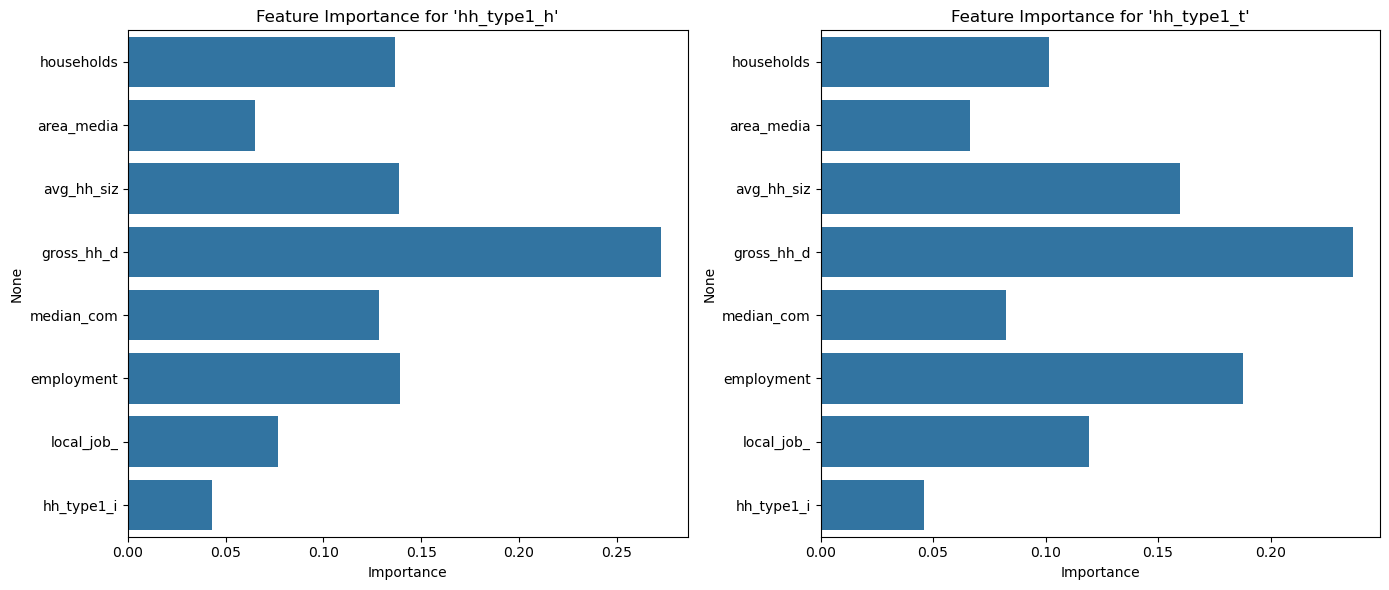

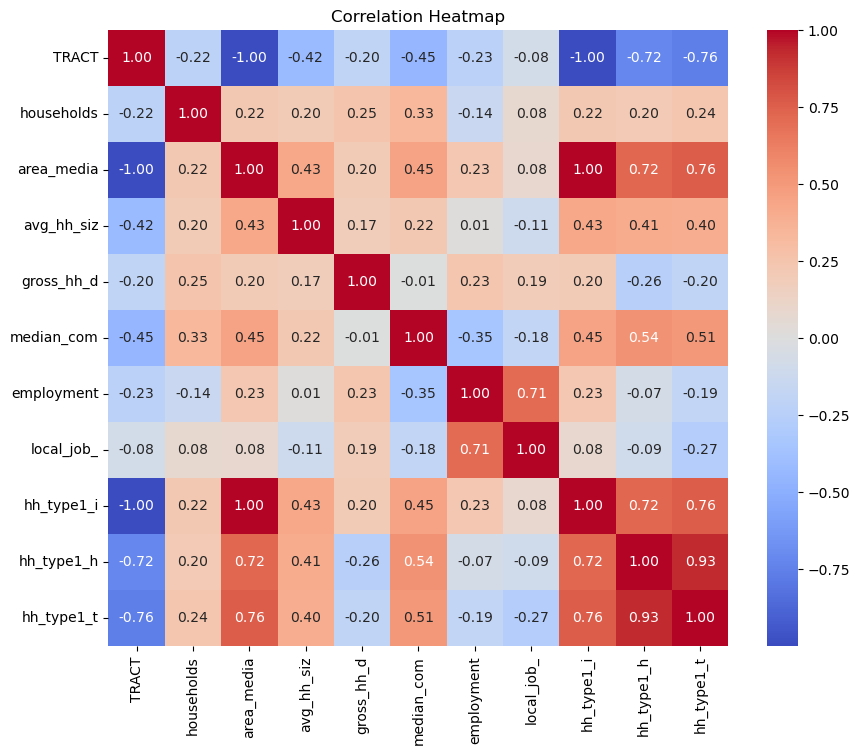

Predicted 'hh_type1_h' for TRACT 212802: 50.504986
Predicted 'hh_type1_t' for TRACT 212802: 21.695778299999986


(50.504986, 21.695778299999986)

In [35]:
# Reading data for Portsmouth
data = pd.read_csv('portsmouth_affordability_index_data_edited.csv')

# Defines independent variables and target variables
X = data.drop(columns=['TRACT', 'hh_type1_h', 'hh_type1_t'])
y_h = data['hh_type1_h']
y_t = data['hh_type1_t']

# Splits data into training and test sets
X_train, X_test, y_h_train, y_h_test, y_t_train, y_t_test = train_test_split(
    X, y_h, y_t, test_size=0.2, random_state=42
)

# Initializes and trains random forest regressors
rf_h = RandomForestRegressor(random_state=42)
rf_t = RandomForestRegressor(random_state=42)

rf_h.fit(X_train, y_h_train)
rf_t.fit(X_train, y_t_train)

# Makes predictions on the test set
y_h_pred = rf_h.predict(X_test)
y_t_pred = rf_t.predict(X_test)

# Calculation of accuracy metrics
mse_h = mean_squared_error(y_h_test, y_h_pred)
r2_h = r2_score(y_h_test, y_h_pred)
mse_t = mean_squared_error(y_t_test, y_t_pred)
r2_t = r2_score(y_t_test, y_t_pred)

print("Accuracy for 'hh_type1_h':")
print(f"  Mean Squared Error: {mse_h}")
print(f"  R² Score: {r2_h}\n")

print("Accuracy for 'hh_type1_t':")
print(f"  Mean Squared Error: {mse_t}")
print(f"  R² Score: {r2_t}\n")

# Function to predict for a specific 'TRACT'
def predict_for_tract(tract_value):
    tract_data = data[data['TRACT'] == tract_value]
    if tract_data.empty:
        print(f"Tract {tract_value} not found.")
        return None
    
    # Extract the feature values for the specific 'TRACT'
    X_tract = tract_data.drop(columns=['TRACT', 'hh_type1_h', 'hh_type1_t'])
    
    # Predict both targets
    hh_type1_h_pred = rf_h.predict(X_tract)[0]
    hh_type1_t_pred = rf_t.predict(X_tract)[0]
    
    print(f"Predicted Housing Cost % of Income for TRACT {tract_value}: {hh_type1_h_pred}")
    print(f"Predicted Transportation Cost % of Income for TRACT {tract_value}: {hh_type1_t_pred}")
    return hh_type1_h_pred, hh_type1_t_pred

# Feature importance graphs
feature_names = X.columns
importances_h = rf_h.feature_importances_
importances_t = rf_t.feature_importances_

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=importances_h, y=feature_names)
plt.title("Feature Importance for Housing Cost % of Income")
plt.xlabel("Importance")

plt.subplot(1, 2, 2)
sns.barplot(x=importances_t, y=feature_names)
plt.title("Feature Importance for Transportation Cost % of Income")
plt.xlabel("Importance")

plt.tight_layout()
plt.savefig('Portsmouth Feature Importance for Housing and Transportation Cost % of Income.png')
plt.show()

# Correlation heatmap of all variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig('Portsmouth Affordability Correlation Map.png')
plt.show()

# Example of predicting for a specific TRACT (e.g., 212802)
predict_for_tract(212802)